# Global Al Hub - Aygaz Veri Analizi Bootcamp Final Project

##### New York City Airbnb Open Data Analysis & Visualization

https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
sns.set_theme()

In [5]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
# Check the number of null values in dataframe
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# Count the number of unique values in name/host_name columns 
print("name :", df["name"].nunique())
print("host_name :", df["host_name"].nunique())

name : 47905
host_name : 11452


In [10]:
# List of host_ids that has null host_name
host_ids_has_null_values=np.unique(df[df["host_name"].isnull()]["host_id"].values)
host_ids_has_null_values

array([   415290,    526653,    919218,   5162530,   5300585,   7779204,
         7822683,  23077718,  24576978,  26138712,  32722063,  33134899,
        39608626, 100971588, 119609345, 159156636, 177146433, 228750026],
      dtype=int64)

In [11]:
# Check all host_ids in dataframe if there is a match to fill missing host_name values
for id in host_ids_has_null_values:
    if(len(df[df["host_id"] == id]) > 1):
        print(f"List of columns with same host_id: {id}")
        print(df[df["host_id"] == id][["host_id","host_name"]].reset_index())
        print("***")
    else:
        print(f"There is no column with same host_id: {id}")
        print("***")

There is no column with same host_id: 415290
***
There is no column with same host_id: 526653
***
There is no column with same host_id: 919218
***
There is no column with same host_id: 5162530
***
There is no column with same host_id: 5300585
***
There is no column with same host_id: 7779204
***
There is no column with same host_id: 7822683
***
There is no column with same host_id: 23077718
***
There is no column with same host_id: 24576978
***
There is no column with same host_id: 26138712
***
List of columns with same host_id: 32722063
   index   host_id host_name
0   8163  32722063       NaN
1   8852  32722063       NaN
***
There is no column with same host_id: 33134899
***
There is no column with same host_id: 39608626
***
There is no column with same host_id: 100971588
***
There is no column with same host_id: 119609345
***
List of columns with same host_id: 159156636
   index    host_id host_name
0  27962  159156636       NaN
1  28042  159156636       NaN
2  28274  159156636     

In [12]:
df.drop(["id", "name",'host_id','host_name'], axis=1,inplace=True)

In [13]:
# Check number_of_reviews of observations that has missing last_review and reviews_per_month

print("number_of_reviews unique values of observation that has missing last_review: ", 
      df[df["last_review"].isnull()]["number_of_reviews"].unique())

print("number_of_reviews unique values of observation that has missing reviews_per_month: ", 
      df[df["reviews_per_month"].isnull()]["number_of_reviews"].unique())

number_of_reviews unique values of observation that has missing last_review:  [0]
number_of_reviews unique values of observation that has missing reviews_per_month:  [0]


In [14]:
# Filling NaN values with zeros last_review/reviews_per_month columns since there is no number_of_reviews

df[["last_review", "reviews_per_month"]]= df[["last_review", "reviews_per_month"]].fillna(0)

In [15]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

C:\Users\Acelya\AppData\Local\Temp\ipykernel_5868\4227779718.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


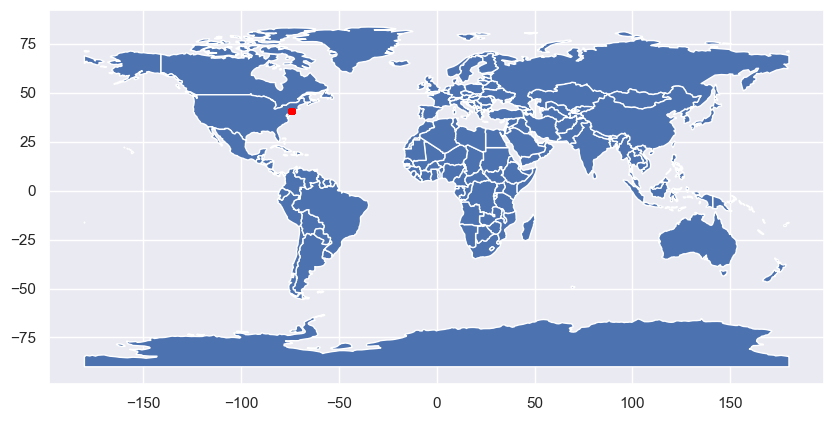

In [16]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

[Text(0.5, 1.0, 'Counts of Neighbourhood Group')]

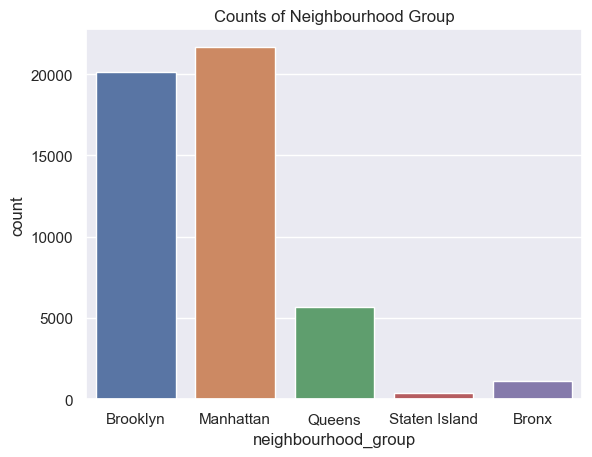

In [17]:
sns.countplot(x='neighbourhood_group', data=df.reset_index()).set(title='Counts of Neighbourhood Group')

[Text(0.5, 1.0, 'Counts of Room Types in Neighbourhood Group')]

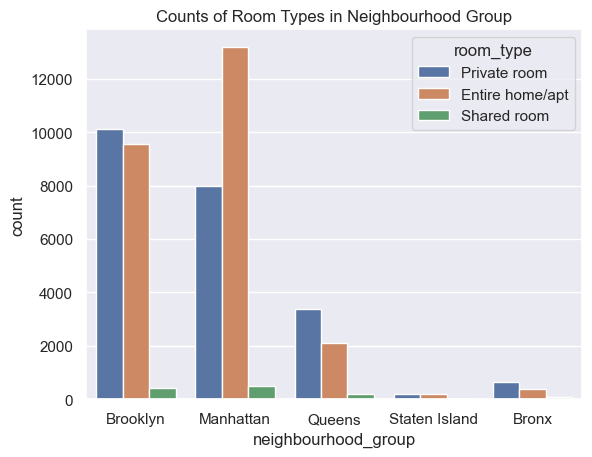

In [18]:
sns.countplot(x='neighbourhood_group', hue="room_type", data=df.reset_index()).set(
    title='Counts of Room Types in Neighbourhood Group')

<Axes: xlabel='price', ylabel='Count'>

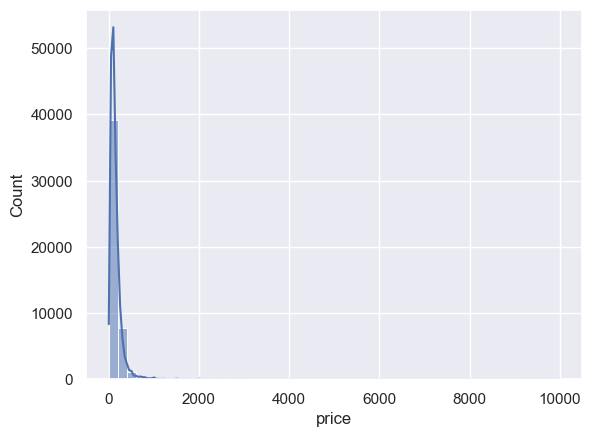

In [19]:
sns.histplot(data=df["price"],kde=True, bins=50)

Text(0.5, 1.0, 'Mean Price of Room Type and Neighbour Group')

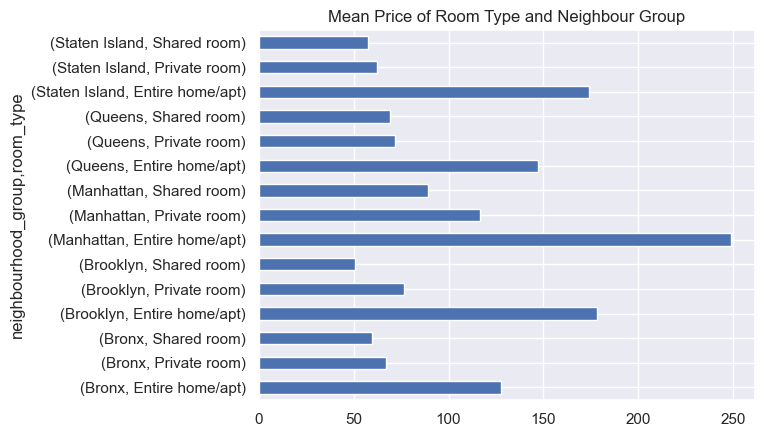

In [20]:
df.groupby(["neighbourhood_group", "room_type"])["price"].mean().plot.barh().set_title(
    "Mean Price of Room Type and Neighbour Group")

<Axes: ylabel='neighbourhood_group,room_type,None'>

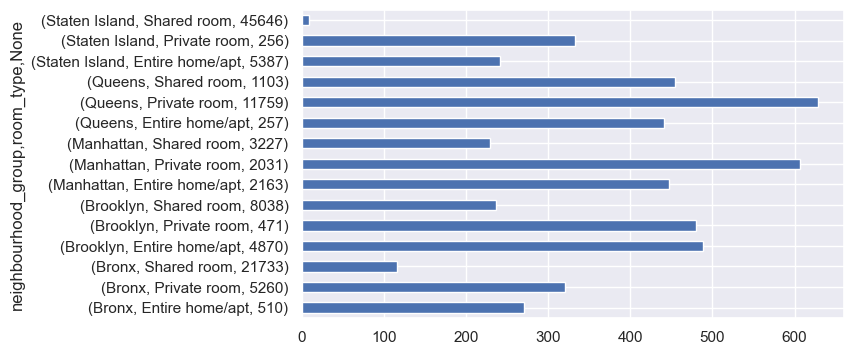

In [21]:
df.sort_values('number_of_reviews', ascending=False).groupby([
    'neighbourhood_group', "room_type"])["number_of_reviews"].nlargest(1).plot.barh(figsize=(7,4))

<Axes: >

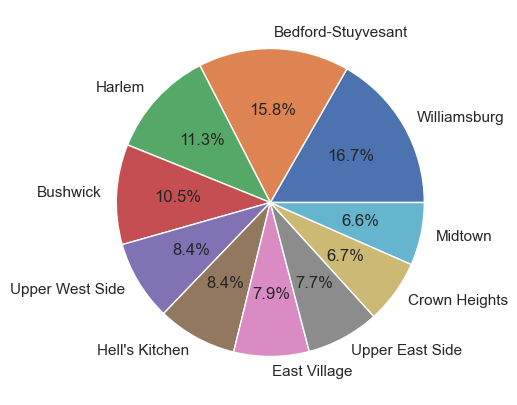

In [22]:
df["neighbourhood"].value_counts().nlargest(10).plot.pie(y="neighbourhood", 
                                                         autopct="%.1f%%", ylabel="",
                                                         figsize=(5,5))

<Axes: xlabel='price', ylabel='room_type'>

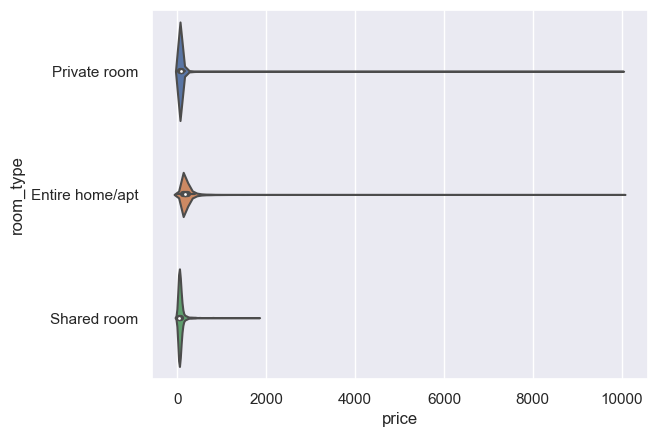

In [23]:
sns.violinplot(x="price", y="room_type", data=df)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     48895 non-null  object 
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

In [25]:
corrDf=df.drop(["neighbourhood", "latitude", "longitude", "last_review"], axis=1)

In [26]:
corrDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               48895 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.0+ MB


In [27]:
corrDf=pd.get_dummies(data=corrDf, columns=["neighbourhood_group", "room_type"], dtype="int64")

In [28]:
corrDf.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
price,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829,-0.041030,-0.098603,0.163976,-0.080205,-0.013840,0.255857,-0.240246,-0.053613
minimum_nights,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303,-0.018186,-0.039658,0.067362,-0.032629,-0.009400,0.074900,-0.073837,-0.004218
number_of_reviews,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028,0.009258,0.017414,-0.045820,0.035967,0.015088,-0.010087,0.017253,-0.023355
reviews_per_month,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732,0.036390,-0.021512,-0.063723,0.107927,0.026648,-0.029565,0.030178,-0.001714
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701,-0.022511,-0.123234,0.152842,-0.033881,-0.012838,0.112193,-0.108945,-0.011737
availability_365,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000,0.060806,-0.079671,-0.005434,0.087113,0.057885,-0.006804,-0.010986,0.058294
neighbourhood_group_Bronx,-0.041030,-0.018186,0.009258,0.036390,-0.022511,0.060806,1.000000,-0.126239,-0.134730,-0.054693,-0.013245,-0.052092,0.042765,0.031041
neighbourhood_group_Brooklyn,-0.098603,-0.039658,0.017414,-0.021512,-0.123234,-0.079671,-0.126239,1.000000,-0.745240,-0.302527,-0.073265,-0.073905,0.079464,-0.017467
neighbourhood_group_Manhattan,0.163976,0.067362,-0.045820,-0.063723,0.152842,-0.005434,-0.134730,-0.745240,1.000000,-0.322875,-0.078193,0.160082,-0.157762,-0.009169
neighbourhood_group_Queens,-0.080205,-0.032629,0.035967,0.107927,-0.033881,0.087113,-0.054693,-0.302527,-0.322875,1.000000,-0.031742,-0.108505,0.100676,0.026693


<Axes: >

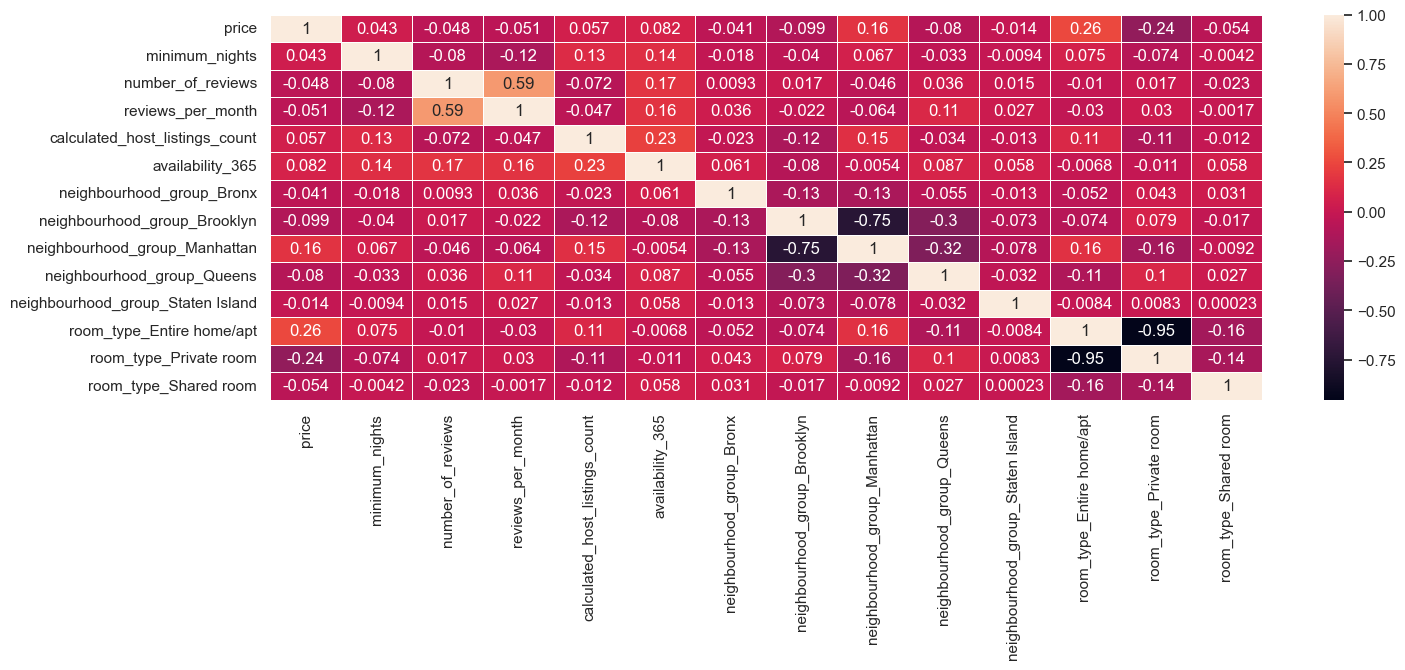

In [32]:
plt.figure(figsize=(16,5))
sns.heatmap(corrDf.corr(), annot=True, linewidths=.5)